In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from matplotlib.colors import ListedColormap

# 1) Charger le dataset HeartDiseaseUCI et l'afficher. Attention à la première colonne

In [146]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
directory= "/content/gdrive/MyDrive/heart.csv"

Mounted at /content/gdrive


In [147]:
import pandas as pd

df = pd.read_csv(directory)
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# 2) Afficher la shape et la description du dataset

In [148]:
df.shape

(1025, 14)

In [149]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# 3) Supprimer les valeurs à Nan et vérifier la shape

In [150]:
df.isnull().sum()
df.dropna(inplace=True)
df.shape

(1025, 14)

# 4) Afficher le nombre de classe de ce dataset

In [151]:
import numpy as np 
unique_target = np.unique(df["target"])

In [152]:
len(unique_target)

2

# 5) Afficher la matrice de scatter plot et la matrice de corrélation

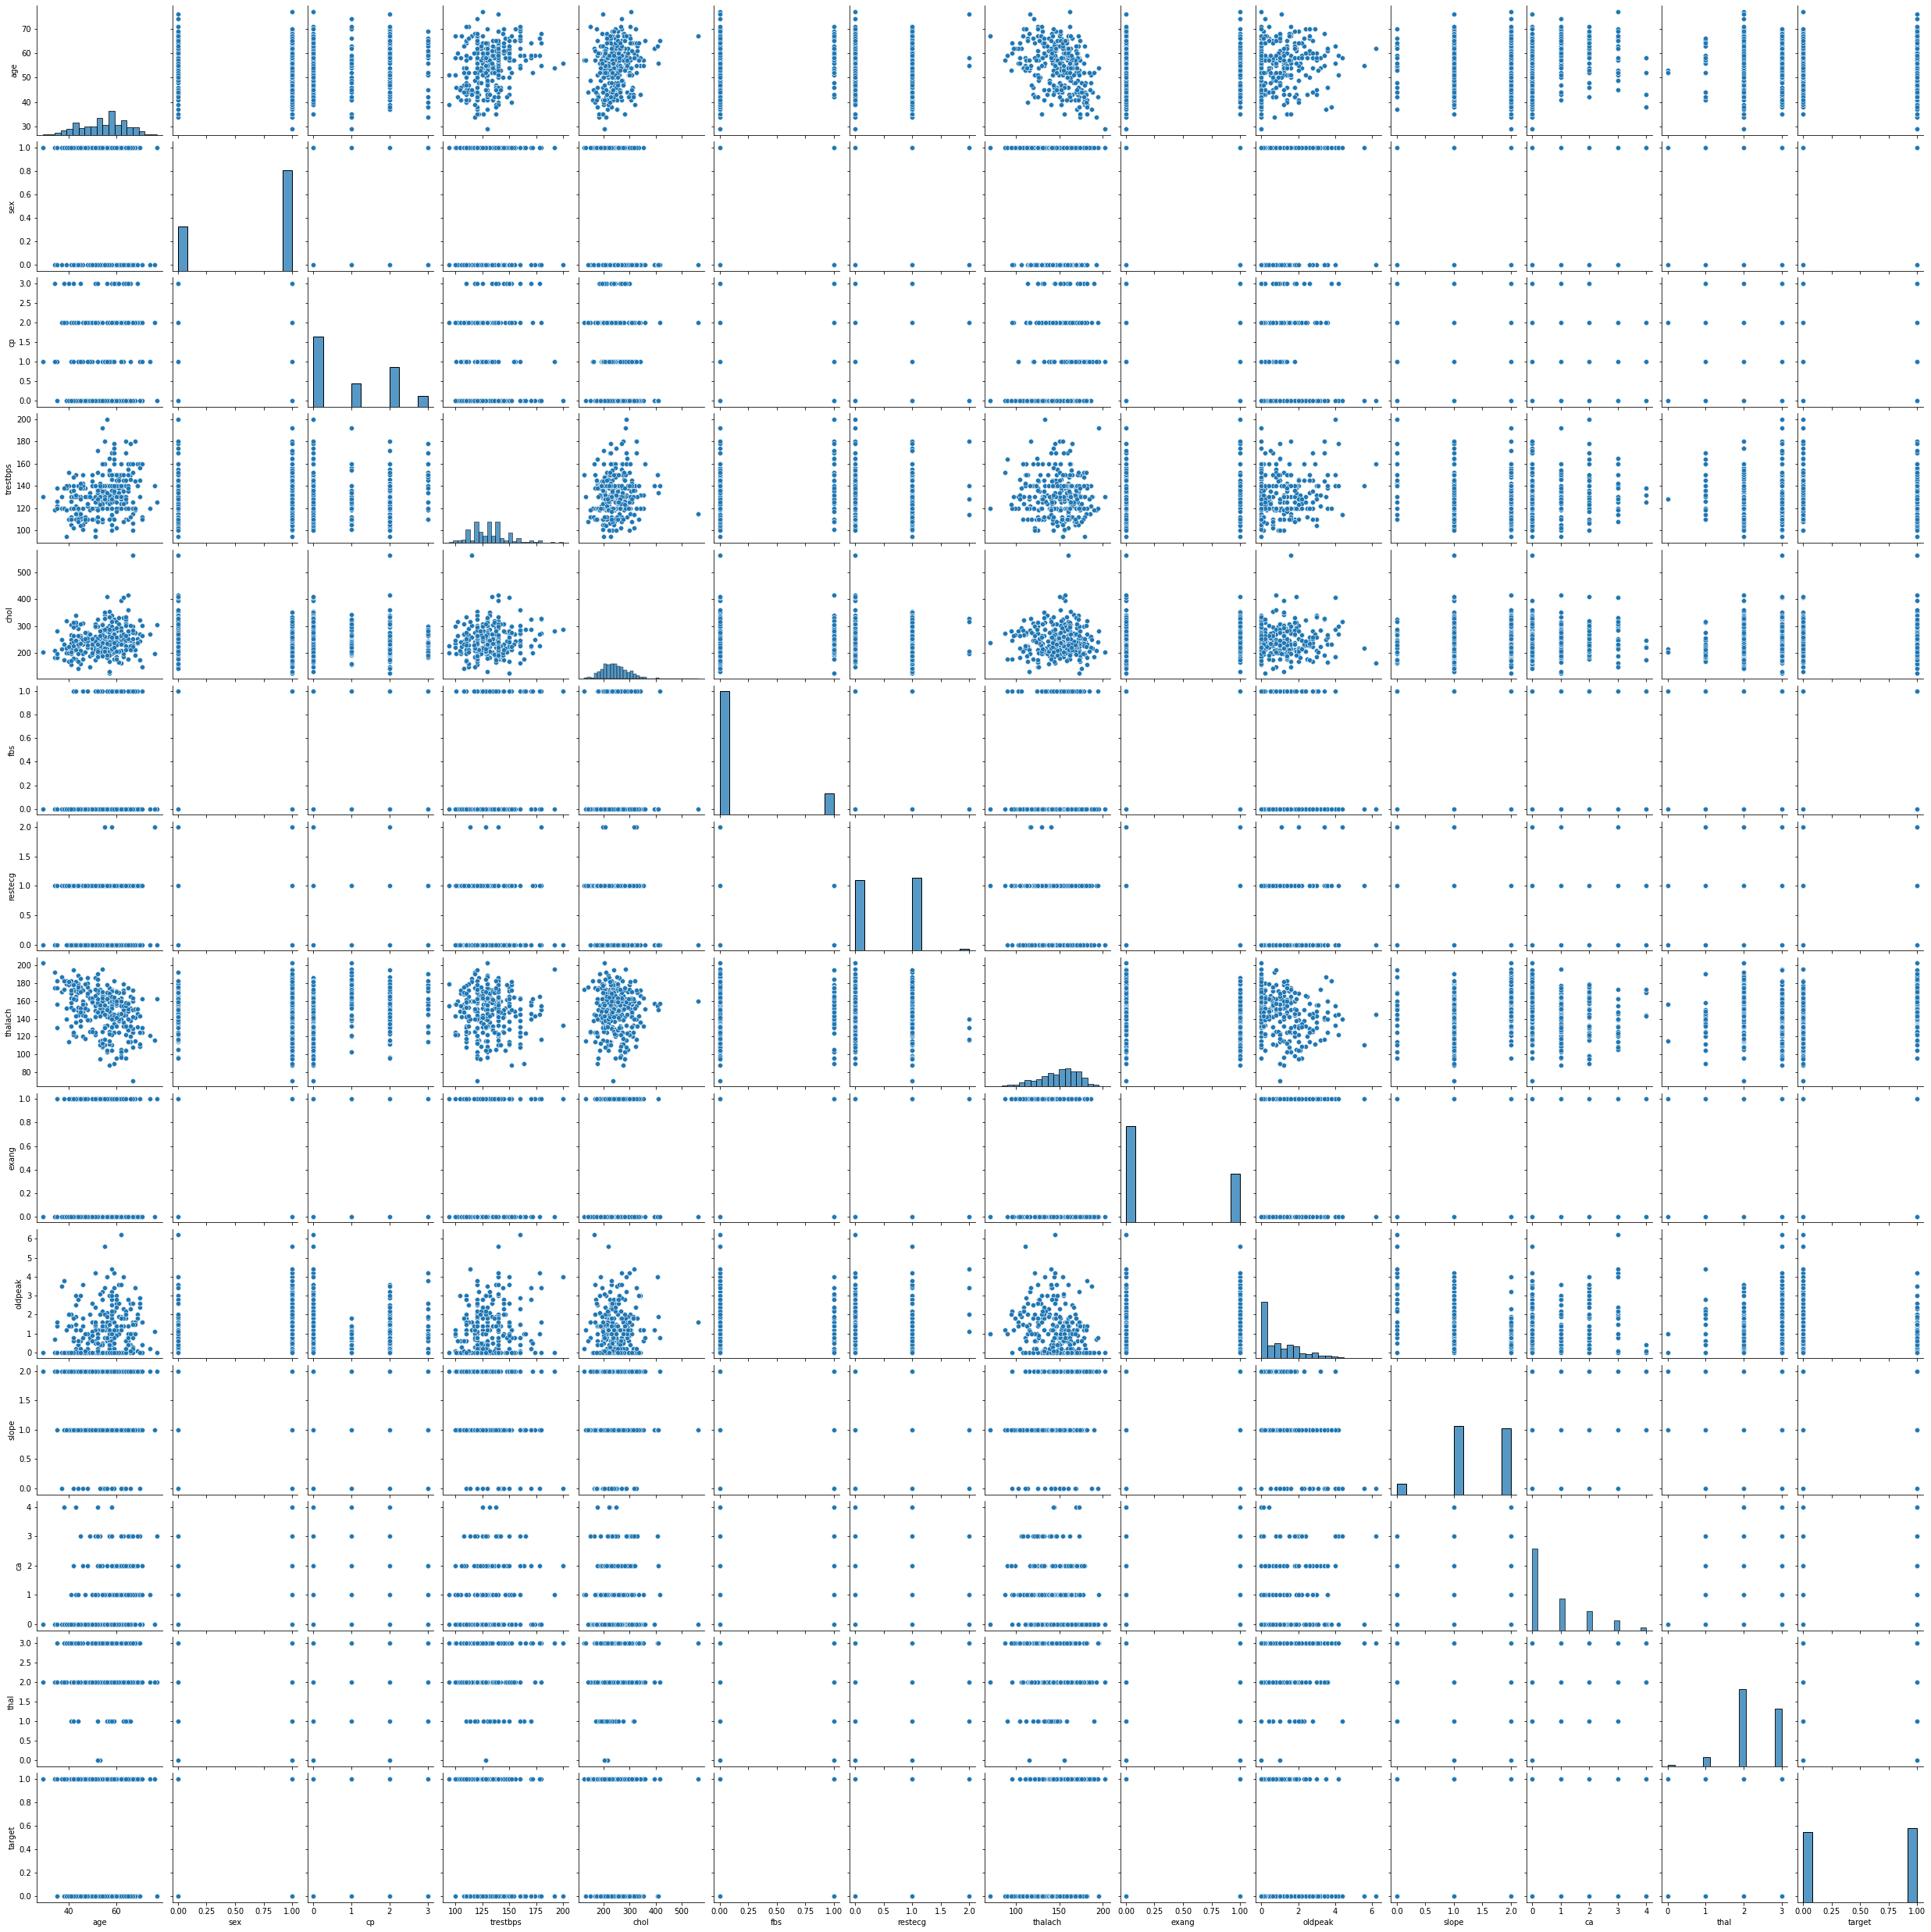

In [153]:
import seaborn as sns
sns.pairplot(df)

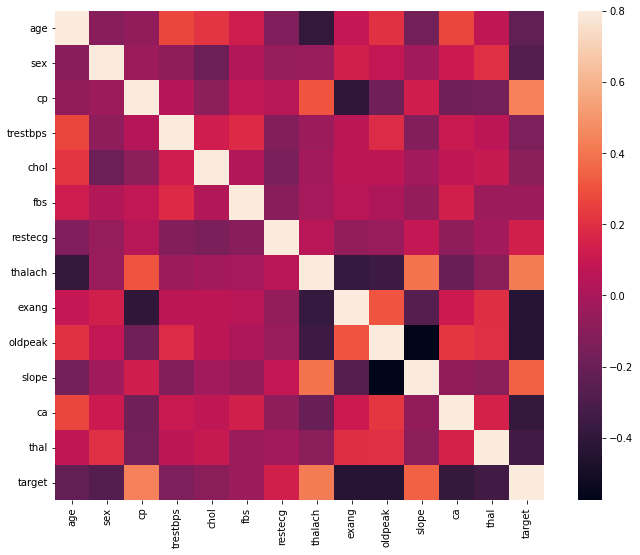

In [154]:
import matplotlib.pyplot as plt
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 152.4 KB


# 6) Créer les variables X et y. A l'aide d'un MinMaxScaler de Sklearn, ramener les valeurs entre 0 et 1 de X. Afficher la moyenne et la variance de X.

In [156]:
from sklearn.preprocessing import MinMaxScaler
X = df.iloc[:,:-1]
col = X.columns
y = df.iloc[ : ,-1]
scaler = MinMaxScaler()
scaler.fit(X)
values = scaler.transform(X)
X[col]=values
print(" mean\n", np.mean(X), " \n \n variance\n",np.var(X))

 mean
 age         0.529878
sex         0.695610
cp          0.314146
trestbps    0.354827
chol        0.273973
fbs         0.149268
restecg     0.264878
thalach     0.596291
exang       0.336585
oldpeak     0.172825
slope       0.692683
ca          0.188537
thal        0.774634
dtype: float64  
 
 variance
 age         0.035688
sex         0.211737
cp          0.117681
trestbps    0.027282
chol        0.013861
fbs         0.126987
restecg     0.069596
thalach     0.030811
exang       0.223296
oldpeak     0.035885
slope       0.095312
ca          0.066344
thal        0.042760
dtype: float64


# 7) Découper le dataset en train et en test, entrainer un Perceptron de SKlearn, afficher le classification_report

In [157]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=43)
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.get_params())
ypred=clf.predict(x_test)
print(classification_report(y_test, ypred, target_names = ["class0","class1"]))

0.7684797768479776
{'alpha': 0.0001, 'class_weight': None, 'early_stopping': False, 'eta0': 1.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': None, 'random_state': 0, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
              precision    recall  f1-score   support

      class0       0.68      0.95      0.79       142
      class1       0.94      0.61      0.74       166

    accuracy                           0.77       308
   macro avg       0.81      0.78      0.77       308
weighted avg       0.82      0.77      0.76       308



# 8) Afficher le type des variables du dataset. Transformer les variables pertinentes en variables caterogielles

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 152.4 KB


In [159]:
nunique = df.nunique()[df.nunique() < 10]
nunique = nunique.index.tolist()
for col in nunique:
  df[col] = df[col].astype("O")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   object 
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   object 
 6   restecg   1025 non-null   object 
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   object 
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   object 
 11  ca        1025 non-null   object 
 12  thal      1025 non-null   object 
 13  target    1025 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 152.4+ KB


# 9) Transformer les variables qualitatives en variables quantitatives

In [160]:
df = pd.get_dummies(df)
df

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,target_0,target_1
0,52,125,212,168,1.0,0,1,1,0,0,...,0,1,0,0,0,0,0,1,1,0
1,53,140,203,155,3.1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,1,0
2,70,145,174,125,2.6,0,1,1,0,0,...,0,0,0,0,0,0,0,1,1,0
3,61,148,203,161,0.0,0,1,1,0,0,...,1,0,0,0,0,0,0,1,1,0
4,62,138,294,106,1.9,1,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,140,221,164,0.0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1021,60,125,258,141,2.8,0,1,1,0,0,...,1,0,0,0,0,0,0,1,1,0
1022,47,110,275,118,1.0,0,1,1,0,0,...,1,0,0,0,0,0,1,0,1,0
1023,50,110,254,159,0.0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


# 10) Définir de nouveau X et y à partir de ce nouveau dataframe, refaire un MinMaxScaler, découper en train et test, entrainer un Perceptron, quelle est la différence de résultat ?

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df.iloc[:,:-1]
col = X.columns
y = df.iloc[ : ,-1]
scaler = MinMaxScaler()
scaler.fit(X)
values = scaler.transform(X)
X[col]=values

In [162]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=43)
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.get_params())
ypred=clf.predict(x_test)
print(classification_report(y_test, ypred, target_names = ["class0","class1"]))

1.0
{'alpha': 0.0001, 'class_weight': None, 'early_stopping': False, 'eta0': 1.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': None, 'random_state': 0, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
              precision    recall  f1-score   support

      class0       1.00      1.00      1.00       142
      class1       1.00      1.00      1.00       166

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



This result is much more accurate and has improved a lot, we got a perfect result on the test file

---



# 11) Refaire la même que 9) en mettant le même nombre d'exemples par classe (cf resample de SKlearn)

In [163]:
y.value_counts()

1    526
0    499
Name: target_1, dtype: int64

# Bonus) Refaire les questions 7 à 11 avec un Multi-Layer Perceptron

In [165]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

df = pd.read_csv(directory)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=43)
clf = MLPClassifier(hidden_layer_sizes=(3,100), activation="relu", solver="adam", random_state=0)
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.get_params())
ypred=clf.predict(x_test)
print(classification_report(y_test, ypred, target_names = ["class0","class1"]))

1.0
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
              precision    recall  f1-score   support

      class0       1.00      1.00      1.00       142
      class1       1.00      1.00      1.00       166

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



In [166]:
nunique = df.nunique()[df.nunique() < 10]
nunique = nunique.index.tolist()
for col in nunique:
  df[col] = df[col].astype("O")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   object 
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   object 
 6   restecg   1025 non-null   object 
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   object 
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   object 
 11  ca        1025 non-null   object 
 12  thal      1025 non-null   object 
 13  target    1025 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 112.2+ KB


In [167]:
df = pd.get_dummies(df)

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X = df.iloc[:,:-1]
col = X.columns
y = df.iloc[ : ,-1]
scaler = MinMaxScaler()
scaler.fit(X)
values = scaler.transform(X)
X[col]=values

In [169]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=43)
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.get_params())
ypred=clf.predict(x_test)
print(classification_report(y_test, ypred, target_names = ["class0","class1"]))

1.0
{'alpha': 0.0001, 'class_weight': None, 'early_stopping': False, 'eta0': 1.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': None, 'random_state': 0, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
              precision    recall  f1-score   support

      class0       1.00      1.00      1.00       142
      class1       1.00      1.00      1.00       166

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



## Ex2

# 12) Importer le dataset winequality, attention au header. Afficher le dataset, la shape, les informations statistiques et enelver les données à Nan. Afficher les corrélations

In [253]:
directory= "/content/gdrive/MyDrive/WineQT.csv"
df=pd.read_csv(directory, index_col="Id")

In [254]:
df.shape

(1143, 12)

In [255]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [256]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

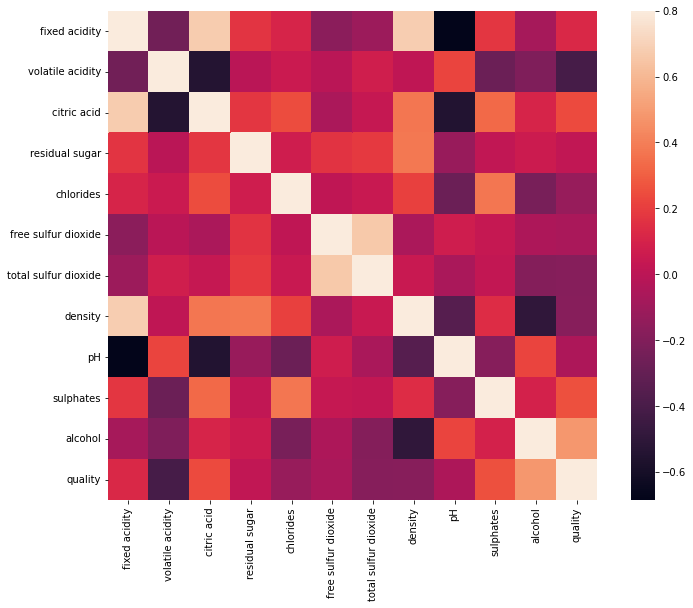

In [257]:
import matplotlib.pyplot as plt
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [258]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5


# 13) Effectuer une ACP sur toutes les variables, avec la règle du coude déterminé le bon nombre de composantes et refaire une ACP. Afficher le résultat

In [259]:
from sklearn.decomposition import PCA
pca = PCA()
values  =pca.fit_transform(df.iloc[:,:-1])
values.shape

(1143, 11)

In [260]:
var_ratio = pca.explained_variance_ratio_
featu = np.arange(1, 12)
featu

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

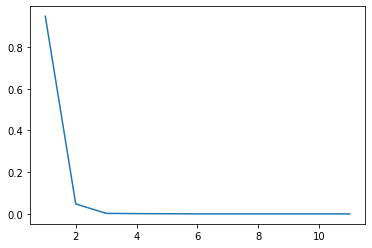

In [261]:
plt.plot(featu, var_ratio)

In [262]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
values = pca.fit_transform(df.iloc[:,:-1])

array([-12.61722029,  22.60732927,   7.77282832, ...,   1.63062077,
         9.96074801,   1.63423306])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


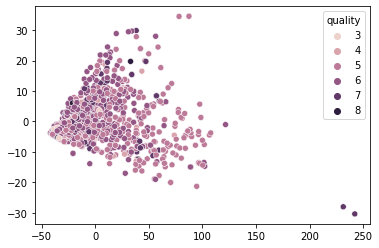

In [263]:
sns.scatterplot(values[:,0],values[:,1], hue=df["quality"])

# 14) Afficher un TSNE à 2 dimensions, que constatez-vous ?

In [264]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
v = tsne.fit_transform(df.iloc[:,:-1])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


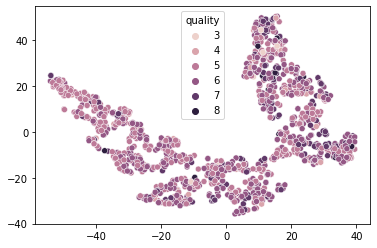

In [265]:
sns.scatterplot(v[:,1], v[:,0], hue=df["quality"])

In [266]:
len(np.unique(df.values[:,-1]))

6

In [267]:
np.unique(df.values[:,-1])

array([3., 4., 5., 6., 7., 8.])

In [268]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5


# Classification

# 15) Préparer les données X et y, découper en train et test.
# 16) Définir et entrainer un MLP (réseau de neurones).
# 17) Afficher la loss et l'accuracy sur le train et l'ensemble de validation

In [289]:
directory= "/content/gdrive/MyDrive/WineQT.csv"
df=pd.read_csv(directory, index_col="Id")
df = pd.get_dummies=()
print(df["quality"].unique())
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=43)
nbr_output = max(np.unique(y_train)) + 1

[5 6 7 4 8 3]


In [309]:
from keras.models import Sequential
from keras.layers import Dense

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train[x_train.columns] = scaler.transform(x_train)
x_test[x_test.columns] = scaler.transform(x_test)
model= Sequential()
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(nbr_output, activation="softmax"))
model.compile(optimizer="adam", loss="SparseCategoricalCrossentropy",metrics="accuracy")
history = model.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=50)
model.summary()

Epoch 1/50
25/25 [==============================] - 1s 19ms/step - loss: 1.6616 - accuracy: 0.4013 - val_loss: 1.2053 - val_accuracy: 0.4023
Epoch 2/50
25/25 [==============================] - 0s 7ms/step - loss: 1.1834 - accuracy: 0.5225 - val_loss: 1.1152 - val_accuracy: 0.5015
Epoch 3/50
25/25 [==============================] - 0s 9ms/step - loss: 1.1004 - accuracy: 0.5663 - val_loss: 1.0131 - val_accuracy: 0.5656
Epoch 4/50
25/25 [==============================] - 0s 8ms/step - loss: 1.0354 - accuracy: 0.5825 - val_loss: 0.9777 - val_accuracy: 0.5656
Epoch 5/50
25/25 [==============================] - 0s 9ms/step - loss: 1.0107 - accuracy: 0.5850 - val_loss: 0.9649 - val_accuracy: 0.6327
Epoch 6/50
25/25 [==============================] - 0s 10ms/step - loss: 0.9940 - accuracy: 0.5788 - val_loss: 0.9410 - val_accuracy: 0.5918
Epoch 7/50
25/25 [==============================] - 0s 8ms/step - loss: 0.9786 - accuracy: 0.6000 - val_loss: 0.9339 - val_accuracy: 0.6122
Epoch 8/50
25/25 [

In [292]:
history.history.keys()
epochs = history.epoch
loss= history.history["loss"]
val_loss= history.history["val_loss"]
accuracy= history.history["accuracy"]
val_accuracy= history.history["val_accuracy"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

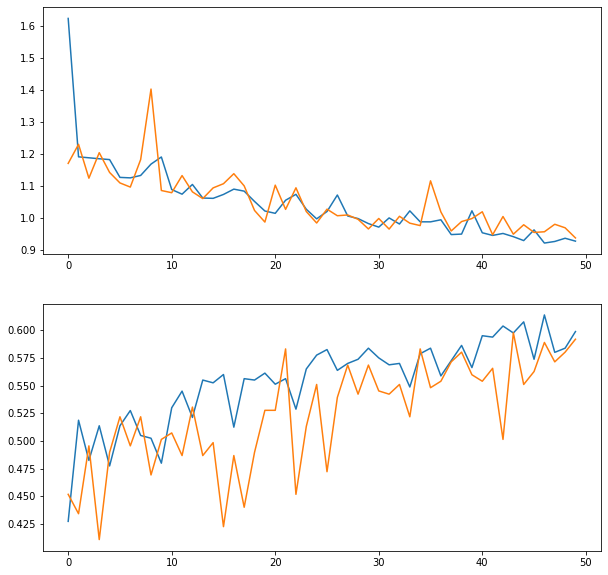

In [301]:
from IPython.core.pylabtools import figsize
fig, axes = plt.subplots(2, 1, figsize=[10,10]) 
sns.lineplot(epochs, loss, ax=axes[0])
sns.lineplot(epochs,val_loss, ax = axes[0])
sns.lineplot(epochs, accuracy, ax=axes[1])
sns.lineplot(epochs,val_accuracy, ax = axes[1])

In [305]:
from keras.models import Sequential
from keras.layers import Dense

model= Sequential()
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(nbr_output, activation="softmax"))
model.compile(optimizer="adam", loss="SparseCategoricalCrossentropy",metrics="accuracy")
history = model.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=50)
model.summary()

Epoch 1/50
25/25 [==============================] - 2s 25ms/step - loss: 1.3717 - accuracy: 0.4575 - val_loss: 1.1811 - val_accuracy: 0.4694
Epoch 2/50
25/25 [==============================] - 0s 15ms/step - loss: 1.1766 - accuracy: 0.5188 - val_loss: 1.1365 - val_accuracy: 0.4694
Epoch 3/50
25/25 [==============================] - 0s 16ms/step - loss: 1.1890 - accuracy: 0.4900 - val_loss: 1.1929 - val_accuracy: 0.4694
Epoch 4/50
25/25 [==============================] - 0s 15ms/step - loss: 1.1643 - accuracy: 0.5150 - val_loss: 1.1481 - val_accuracy: 0.4606
Epoch 5/50
25/25 [==============================] - 0s 9ms/step - loss: 1.1609 - accuracy: 0.4975 - val_loss: 1.1219 - val_accuracy: 0.5131
Epoch 6/50
25/25 [==============================] - 0s 10ms/step - loss: 1.1376 - accuracy: 0.5188 - val_loss: 1.1459 - val_accuracy: 0.4723
Epoch 7/50
25/25 [==============================] - 0s 17ms/step - loss: 1.1207 - accuracy: 0.5250 - val_loss: 1.1114 - val_accuracy: 0.5277
Epoch 8/50
25/

In [306]:
history.history.keys()
epochs = history.epoch
loss= history.history["loss"]
val_loss= history.history["val_loss"]
accuracy= history.history["accuracy"]
val_accuracy= history.history["val_accuracy"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

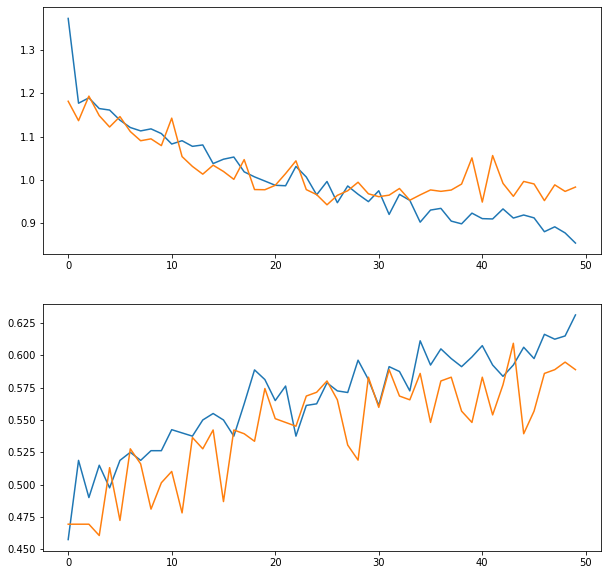

In [307]:
from IPython.core.pylabtools import figsize
fig, axes = plt.subplots(2, 1, figsize=[10,10]) 
sns.lineplot(epochs, loss, ax=axes[0])
sns.lineplot(epochs,val_loss, ax = axes[0])
sns.lineplot(epochs, accuracy, ax=axes[1])
sns.lineplot(epochs,val_accuracy, ax = axes[1])

# Regression

In [335]:
pip install tensorflow_addons

In [371]:
import tensorflow as tf
import tensorflow_addons as tfa
result = tfa.metrics.RSquare(dtype=tf.float32, y_shape=(1,))

# 18)-20) Même question que précédemment avec un problème de régression. Utiliser la fonction result comme métrique

In [372]:
directory= "/content/gdrive/MyDrive/WineQT.csv"
df=pd.read_csv(directory, index_col="Id")
print(df["quality"].unique())
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=43)
nbr_output = max(np.unique(y_train)) + 1

[5 6 7 4 8 3]


In [373]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [374]:
x_train.shape

(800, 11)

In [379]:
from keras.models import Sequential
from keras.layers import Dense

model= Sequential()
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(1, activation="linear"))
model.compile(optimizer="adam", loss="MSE",metrics=result)
history = model.fit(x_train, tf.reshape(y_train, [-1, 1]), validation_data=(x_test,tf.reshape(y_test, [-1, 1])),epochs=50)
model.summary()

Epoch 1/50
25/25 [==============================] - 1s 20ms/step - loss: 6.1765 - r_square: -10.6799 - val_loss: 1.0184 - val_r_square: -0.6678
Epoch 2/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6759 - r_square: -0.0166 - val_loss: 0.5390 - val_r_square: 0.1173
Epoch 3/50
25/25 [==============================] - 0s 7ms/step - loss: 0.5629 - r_square: 0.1534 - val_loss: 0.5178 - val_r_square: 0.1520
Epoch 4/50
25/25 [==============================] - 0s 8ms/step - loss: 0.5205 - r_square: 0.2172 - val_loss: 0.5218 - val_r_square: 0.1454
Epoch 5/50
25/25 [==============================] - 0s 8ms/step - loss: 0.5089 - r_square: 0.2346 - val_loss: 0.4940 - val_r_square: 0.1910
Epoch 6/50
25/25 [==============================] - 0s 9ms/step - loss: 0.5361 - r_square: 0.1936 - val_loss: 0.5392 - val_r_square: 0.1170
Epoch 7/50
25/25 [==============================] - 0s 6ms/step - loss: 0.5085 - r_square: 0.2352 - val_loss: 0.6499 - val_r_square: -0.0643
Epoch 8/50
25/

In [ ]:
history.history.keys()
epochs = history.epoch
loss= history.history["loss"]
val_loss= history.history["val_loss"]
accuracy= history.history["accuracy"]
val_accuracy= history.history["val_accuracy"]

In [ ]:
from IPython.core.pylabtools import figsize
fig, axes = plt.subplots(2, 1, figsize=[10,10]) 
sns.lineplot(epochs, loss, ax=axes[0])
sns.lineplot(epochs,val_loss, ax = axes[0])
sns.lineplot(epochs, accuracy, ax=axes[1])
sns.lineplot(epochs,val_accuracy, ax = axes[1])

# Bonus) Compétition entre étudiants, chercher la meilleure architecture pour la régression et la classification sans trop overfitter ... ! Que le meilleur gagne !